In [1]:
import pandas as pd
from collections import Counter
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Visualization Imports
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

In [2]:
# Read in the cleaned dataframes of /r/onion titles and the /r/notonion titles
df_onion = pd.read_csv('data/2020/onion_clean_2020.csv')
df_notonion = pd.read_csv('data/2020/notonion_clean_2020.csv')

In [3]:
# Select the vectorizer and parameters
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))

# Fit and transform the data into a vectorized dataframe
# vect_series is a placeholder to turn into a dataframe: dfvect
vect_series_onion = vectorizer.fit_transform(df_onion['Title'].values.astype('U'))
df_vect_onion = pd.DataFrame(vect_series_onion.toarray(), columns=vectorizer.get_feature_names())

vect_series_notonion = vectorizer.fit_transform(df_notonion['Title'].values.astype('U'))
df_vect_notonion = pd.DataFrame(vect_series_notonion.toarray(), columns=vectorizer.get_feature_names())

In [4]:
print(df_vect_onion.shape)
df_vect_onion.head(2)

(1080, 2911)


,abacus,abandoned,ability,able,aborted,abortion,absolutely,academy,acceptable,acceptance,...,yogi,york,yorker,young,younger,zero,zombie,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(df_vect_notonion.shape)
df_vect_notonion.head(2)

(35181, 11414)


,aback,abandon,abandoned,abbas,abbey,abduction,abductor,abetment,abide,ability,...,zigzag,zimbabwe,zip,zipping,zodiac,zombie,zone,zoo,zoom,zoonotic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_vect_onion.append(df_vect_onion.sum(numeric_only=True), ignore_index=True);

In [7]:
print('Top 15 words for /r/onion:', )
df_vect_onion_top15 = df_vect_onion.sum().sort_values().reset_index().iloc[len(df_vect_onion.columns)-15:]
df_vect_onion_top15

Top 15 words for /r/onion:


,index,0
2896,people,21
2897,life,23
2898,day,24
2899,make,24
2900,police,26
2901,woman,30
2902,black,32
2903,report,32
2904,time,33
2905,like,34


In [8]:
print('Total word count /r/onion: ', df_vect_onion.sum().sort_values().reset_index()[0].sum())
onion_maxwords = df_vect_onion.sum().sort_values().reset_index()[0].sum()

Total word count /r/onion:  6483


In [9]:
df_vect_notonion.append(df_vect_notonion.sum(numeric_only=True), ignore_index=True);

In [10]:
print('Top 15 words for /r/nottheonion:')
df_vect_onion_top15 = df_vect_notonion.sum().sort_values().reset_index().iloc[len(df_vect_notonion.columns)-15:]
df_vect_onion_top15

Top 15 words for /r/nottheonion:


,index,0
11399,white,678
11400,say,687
11401,pandemic,689
11402,china,692
11403,news,703
11404,year,718
11405,president,758
11406,black,797
11407,woman,1096
11408,people,1209


In [11]:
print('Total word count /r/nottheonion: ', df_vect_notonion.sum().sort_values().reset_index()[0].sum())
notonion_maxwords = df_vect_notonion.sum().sort_values().reset_index()[0].sum()

Total word count /r/nottheonion:  197647


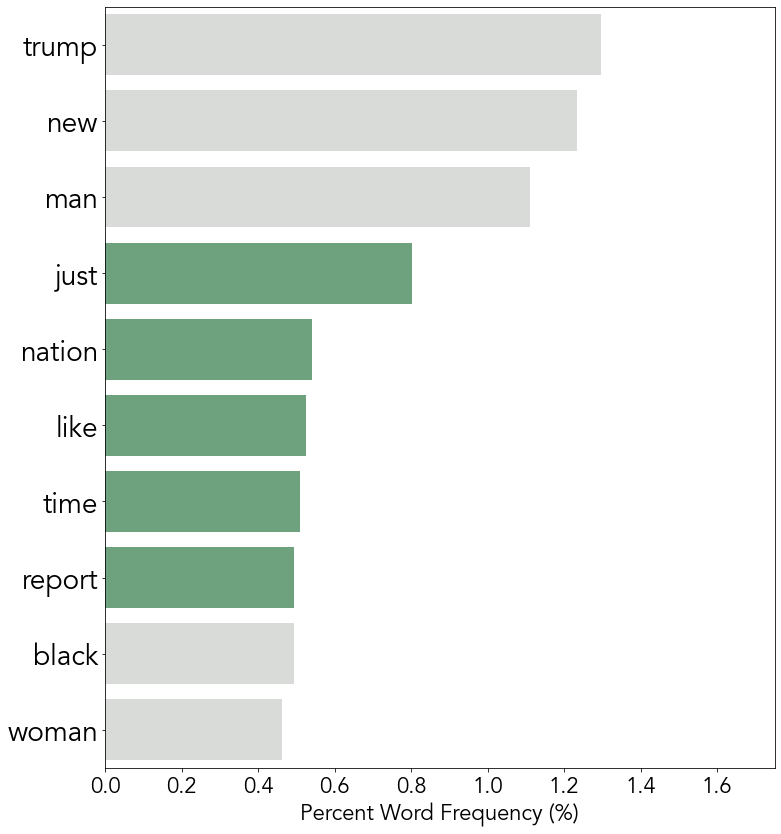

In [19]:
fig1 = plt.figure(figsize=(12,14))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)
'''
Make this figure POP out colors during the presentation.
Start with a bunch of greys, then pop out depression survey, finally other interesing features.
'''


# Set depression survey questions in the same color
color_list = ['#d8dcd6', '#d8dcd6', '#d8dcd6', '#65ab7c', '#65ab7c',
              '#65ab7c', '#65ab7c', '#65ab7c', '#d8dcd6', '#d8dcd6']

# Diagonal Line (Skip Adding Into Legend)
ax1 = sns.barplot(x = [84, 80, 72, 52, 35, 34, 33, 32, 32, 30]/onion_maxwords*100,
                  y = ['trump', 'new', 'man', 'just', 'nation', 'like', 'time', 'report', 'black', 'woman'],
                  palette = color_list)

# Axes properties and labels
ax1.set_xlabel('Percent Word Frequency (%)', fontdict=font, fontsize = 22)
ax1.set_ylabel('', fontdict=font, fontsize='xx-large')
ax1.set_xlim([0, 1.75])
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)

plt.savefig('images/onion_top10words.png', bbox_inches = 'tight', dpi = 300)

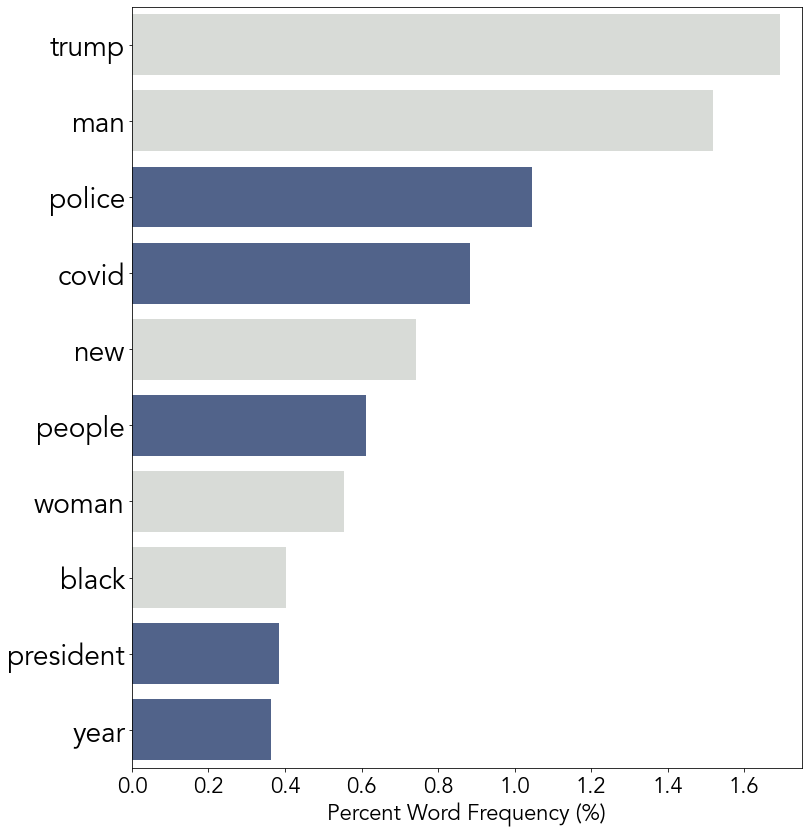

In [13]:
fig2 = plt.figure(figsize=(12,14))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)
'''
Make this figure POP out colors during the presentation.
Start with a bunch of greys, then pop out depression survey, finally other interesing features.
'''


# Set depression survey questions in the same color
color_list = ['#d8dcd6', '#d8dcd6', '#475f94', '#475f94', '#d8dcd6',
              '#475f94', '#d8dcd6', '#d8dcd6', '#475f94', '#475f94']

# Diagonal Line (Skip Adding Into Legend)
ax2 = sns.barplot(x = [3346, 3000, 2067, 1748, 1468, 1209, 1096, 797, 758, 718]/notonion_maxwords*100,
                  y = ['trump', 'man', 'police', 'covid', 'new', 'people', 'woman', 'black', 'president', 'year'],
                  palette = color_list)

# Axes properties and labels
ax2.set_xlabel('Percent Word Frequency (%)', fontdict=font, fontsize = 22)
ax2.set_ylabel('', fontdict=font, fontsize='xx-large')
ax2.set_xlim([0, 1.75])
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)

plt.savefig('images/notonion_top10words.png', bbox_inches = 'tight', dpi = 300)

### Sentiment Analysis

In [14]:
df_onion = pd.read_csv('data/2020/onion_clean_2020.csv')
df_notonion = pd.read_csv('data/2020/notonion_clean_2020.csv')

In [15]:
frames = [df_onion, df_notonion]
df_merge = pd.concat(frames)

In [16]:
df_merge.sample(5)

,Onion,Title,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Compound_Sentiment
32385,0,State Trooper car fire filled with,0.000,0.267,0.733,-0.4588
16135,0,South club sex but for controversy,0.146,0.126,0.728,0.0772
31932,0,man turns home into nightmare,0.000,0.000,1.000,0.0000
6309,0,Baseball Starved Turn Out Watch Middle Aged Me...,0.231,0.000,0.769,0.3400
10154,0,anthem wrapped racist history and should with ...,0.000,0.200,0.800,-0.6124


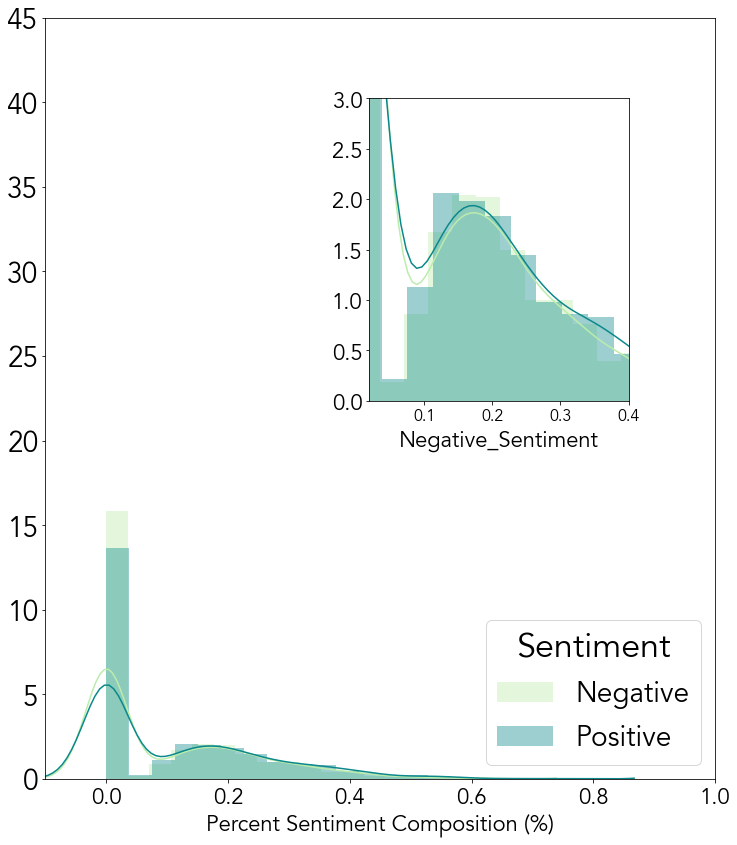

In [17]:
fig3 = plt.figure(figsize=(12,14))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)
'''
Make this figure POP out colors during the presentation.
Start with a bunch of greys, then pop out depression survey, finally other interesing features.
'''

# Diagonal Line (Skip Adding Into Legend)
x_positive = df_onion['Positive_Sentiment']
x_negative = df_onion['Negative_Sentiment']
ax3 = sns.distplot(x_positive, color = '#bcecac')
sns.distplot(x_negative, color = '#0a888a', ax=ax3)

# Axes properties and labels
ax3.set_xlabel('Percent Sentiment Composition (%)', fontdict=font, fontsize = 22)
ax3.set_ylabel('', fontdict=font, fontsize='xx-large')
ax3.set(ylim=(0, 45))
ax3.set(xlim=(-0.1, 1))
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)

# Legend
plt.legend(['Negative', 'Positive'],
           title = 'Sentiment',
           title_fontsize = 34,
           markerscale = 3,
           fontsize = 28,
           loc = 4)

# Subplot
ax13 = plt.axes([0.5, 0.5, 0.3, 0.3])
ax13.set_xlabel('', fontdict=font, fontsize = 22)
ax13.set_ylabel('', fontdict=font, fontsize='xx-large')
sns.distplot(x_positive, color = '#bcecac', ax=ax13)
sns.distplot(x_negative, color = '#0a888a', ax=ax13)
ax13.set_xlim([0.02, 0.4])
ax13.set(ylim=(0, 3))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 22)
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=4)

plt.savefig('images/onion_sentiment.png', bbox_inches = 'tight', dpi = 300)

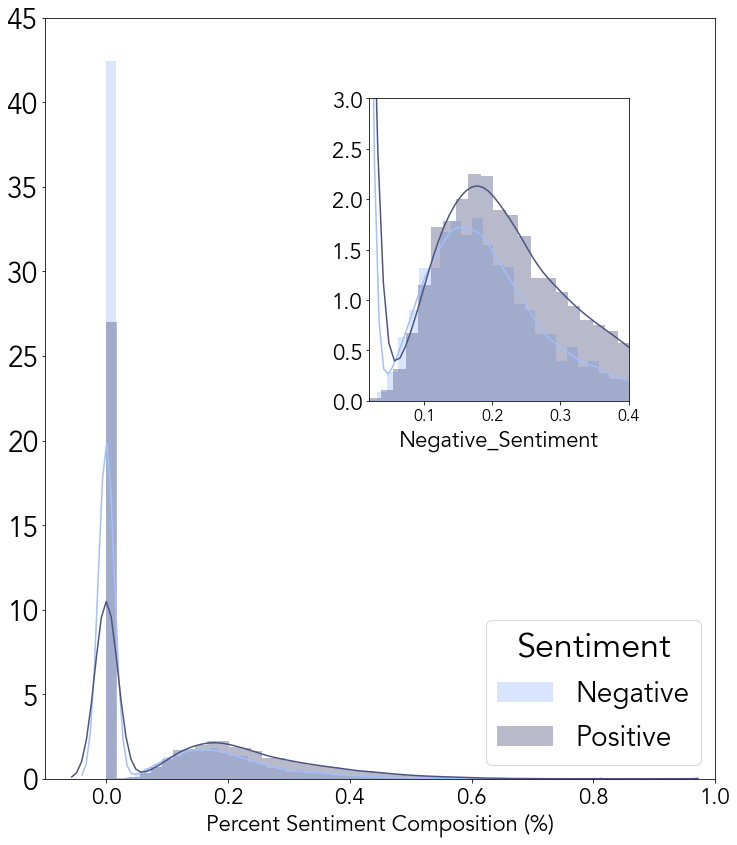

In [18]:
fig4 = plt.figure(figsize=(12,14))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)
'''
Make this figure POP out colors during the presentation.
Start with a bunch of greys, then pop out depression survey, finally other interesing features.
'''

# Diagonal Line (Skip Adding Into Legend)
x_positive = df_notonion['Positive_Sentiment']
x_negative = df_notonion['Negative_Sentiment']
ax5 = sns.distplot(x_positive, color = '#a2bffe')
sns.distplot(x_negative, color = '#4e5481', ax=ax5)

# Axes properties and labels
ax5.set_xlabel('Percent Sentiment Composition (%)', fontdict=font, fontsize = 22)
ax5.set_ylabel('', fontdict=font, fontsize='xx-large')
ax5.set(ylim=(0, 45))
ax5.set(xlim=(-0.1, 1))
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)

# Legend
plt.legend(['Negative', 'Positive'],
           title = 'Sentiment',
           title_fontsize = 34,
           markerscale = 3,
           fontsize = 28,
           loc = 4)

# Subplot
ax15 = plt.axes([0.5, 0.5, 0.3, 0.3])
ax15.set_xlabel('', fontdict=font, fontsize = 22)
ax15.set_ylabel('', fontdict=font, fontsize='xx-large')
sns.distplot(x_positive, color = '#a2bffe', ax=ax15)
sns.distplot(x_negative, color = '#4e5481', ax=ax15)
ax15.set_xlim([0.02, 0.4])
ax15.set(ylim=(0, 3))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 22)
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=4)

plt.savefig('images/notonion_sentiment.png', bbox_inches = 'tight', dpi = 300)